<a href="https://colab.research.google.com/github/ryanraba/casa6/blob/master/CASA6_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [0]:
import os

print("installing pre-requisite packages...")
#os.system("apt-get install python-casacore")
os.system("apt-get install libgfortran3")

print("installing casatasks...")
os.system("pip install --extra-index-url https://casa-pip.nrao.edu/repository/pypi-group/simple casatools")
os.system("pip install --extra-index-url https://casa-pip.nrao.edu/repository/pypi-group/simple casatasks")
os.system("pip install --extra-index-url https://casa-pip.nrao.edu/repository/pypi-group/simple casaviewer")
os.system("pip install --extra-index-url https://casa-pip.nrao.edu/repository/pypi-group/simple casashell")

print("downloading MeasurementSet from CASAguide First Look at Imaging")
os.system("wget https://bulk.cv.nrao.edu/almadata/public/working/sis14_twhya_calibrated_flagged.ms.tar")
os.system("tar -xvf sis14_twhya_calibrated_flagged.ms.tar")

print("building config files...")
os.system("mkdir ~/.casa")
!echo datapath=[\'/content/\'] > ~/.casa/toolrc.py
!more /root/.casa/toolrc.py

print('complete')

installing pre-requisite packages...
installing casatasks...
downloading MeasurementSet from CASAguide First Look at Imaging
building config files...
datapath=[/content/]
complete


In [0]:
import casatasks
import casatools
from casatools import ctuser
from importlib import reload
reload(ctuser)

help(ctuser)

# Getting Started

In [0]:
from casatasks import listobs

rc = listobs(vis='sis14_twhya_calibrated_flagged.ms')

print(os.popen("tail casa-*.log").read())

2019-07-10 14:52:57	INFO	listobs::ms::summary+	  15   DV10  A071      12.0 m   -067.45.19.9  -22.53.23.5        -60.7887     -563.2541       23.3799  2225011.141945 -5440147.560932 -2481557.855663
2019-07-10 14:52:57	INFO	listobs::ms::summary+	  16   DV13  A072      12.0 m   -067.45.12.6  -22.53.24.0        147.1742     -580.5887       18.1825  2225199.254375 -5440058.161494 -2481571.803699
2019-07-10 14:52:57	INFO	listobs::ms::summary+	  17   DV15  A074      12.0 m   -067.45.12.1  -22.53.32.0        161.8159     -828.6196       18.7688  2225176.483514 -5439963.820451 -2481800.529842
2019-07-10 14:52:57	INFO	listobs::ms::summary+	  18   DV16  A069      12.0 m   -067.45.21.3  -22.53.30.2       -101.4797     -770.1047       23.2972  2224942.993176 -5440088.421459 -2481748.384855
2019-07-10 14:52:57	INFO	listobs::ms::summary+	  19   DV17  A138      12.0 m   -067.45.17.1  -22.53.34.4         19.1461     -901.2603       26.0137  2225036.269025 -5439997.853009 -2481870.267607
2019-07-10 14:5

# tclean Example

In [0]:
from casatasks import tclean

print("running tclean, may take a bit...")

tclean(vis='sis14_twhya_calibrated_flagged.ms', imagename='first_image',
       field='5', spw='', specmode='mfs', deconvolver='hogbom', nterms=1,
       gridder='standard', imsize=[250,250], cell=['0.1arcsec'],
       weighting='natural', threshold='0mJy', niter=5000, 
       interactive=False, savemodel='modelcolumn')

print("complete")

running tclean, may take a bit...
complete


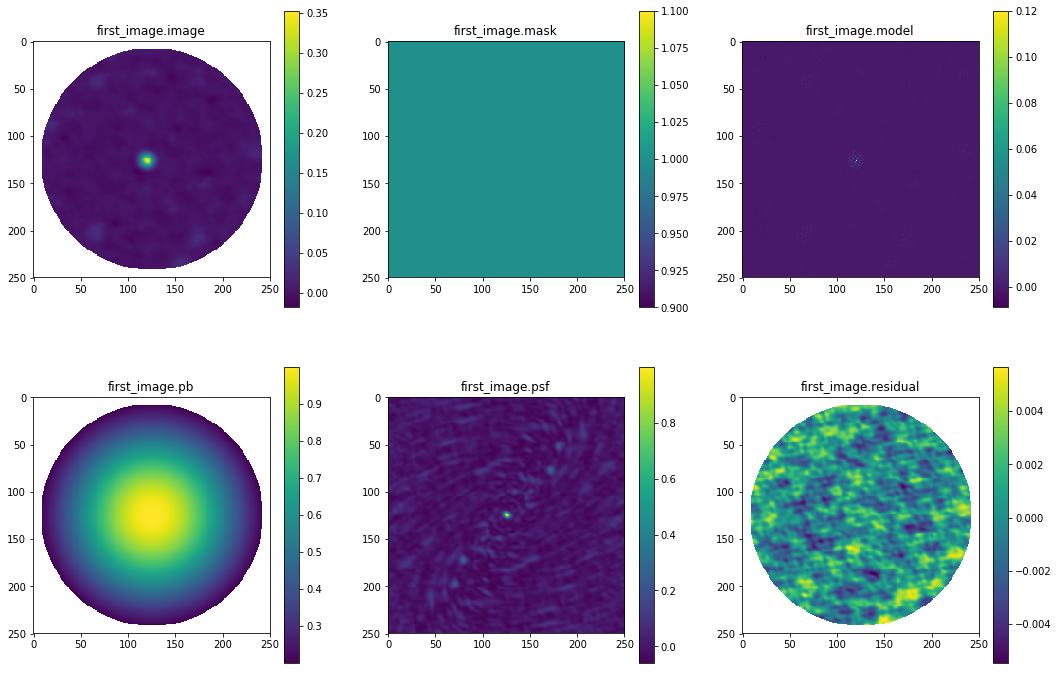

In [0]:
import matplotlib.pyplot as plt
from astropy.io import fits
from casatasks import exportfits

filenames = ['first_image.image', 'first_image.mask', 'first_image.model', 
             'first_image.pb', 'first_image.psf', 'first_image.residual']

ff, aa = plt.subplots(2,3, figsize=(18,12))
for ii, name in enumerate(filenames):
  exportfits(imagename=name, fitsimage=name+'.fits', overwrite=True)
  xx,yy = int(ii/3),ii%3
  im = aa[xx,yy].imshow(fits.getdata(name+'.fits')[0,0,:,:])
  plt.colorbar(im, ax=aa[xx,yy])
  aa[xx,yy].set_title(name)


# PlotMS Example
Currently broken, completion pending

Really, don't look, it's ugly

In [0]:
import os

print("configuring virtual display...")
os.system("pip install xvfbwrapper")
os.system("apt-get install xvfb")

from xvfbwrapper import Xvfb

print("downloading PlotMS...")
os.system("wget https://www.cv.nrao.edu/~rraba/casaplotms.AppImage")
os.system("chmod 777 casaplotms.AppImage")
os.system("./casaplotms.AppImage --appimage-extract")
#!cp /usr/lib/x86_64-linux-gnu/libstdc++.so.6 ./squashfs-root/usr/lib/.
os.system("rm ./squashfs-root/usr/lib/libstdc++.so.6")
os.system("rm ./squashfs-root/usr/lib/libpthread.so.0")
print("complete")

configuring virtual display...
downloading PlotMS...
complete


In [0]:
def PlotMS():
  vdisplay = Xvfb()
  vdisplay.start()
  !./squashfs-root/usr/bin/CASAplotms --nopopups --nogui vis=sis14_twhya_calibrated_flagged.ms xaxis=Time yaxis=Amp
  vdisplay.stop()